In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# tüm frameleri gör
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('osuDataset.csv')
print(df.shape)
df['mode'].value_counts()

(4253, 26)


osu       2364
taiko      786
mania      759
fruits     344
Name: mode, dtype: int64

In [4]:
df = df.query("ranked == 1")

In [5]:
df = df.query("mode == 'osu'")
print(df.shape)
df['mode'].value_counts()

(2344, 26)


osu    2344
Name: mode, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 13 to 4247
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beatmapset_id      2344 non-null   int64  
 1   difficulty_rating  2344 non-null   float64
 2   id                 2344 non-null   int64  
 3   mode               2344 non-null   object 
 4   status             2344 non-null   object 
 5   total_length       2344 non-null   int64  
 6   user_id            2344 non-null   int64  
 7   version            2344 non-null   object 
 8   accuracy           2344 non-null   float64
 9   ar                 2344 non-null   float64
 10  bpm                2344 non-null   float64
 11  convert            2344 non-null   bool   
 12  count_circles      2344 non-null   int64  
 13  count_sliders      2344 non-null   int64  
 14  count_spinners     2344 non-null   int64  
 15  cs                 2344 non-null   float64
 16  deleted_at         0 no

In [7]:
y = df['difficulty_rating']
x_ = df[['hit_length','cs','drain','ar','accuracy','bpm']]
x_.describe()

,hit_length,cs,drain,ar,accuracy,bpm
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,151.779010,3.828925,4.683319,7.798422,6.862799,165.457149
std,75.316987,0.634053,1.086388,1.742350,1.919398,37.368717
min,30.000000,0.000000,0.000000,0.000000,0.000000,57.333300
25%,87.000000,3.500000,4.000000,7.000000,6.000000,140.000000
50%,134.500000,4.000000,5.000000,8.500000,7.500000,172.000000
75%,207.000000,4.000000,5.400000,9.000000,8.400000,187.000000
max,625.000000,10.000000,9.000000,10.000000,10.000000,300.999000


In [8]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x_)
pd.DataFrame(x).describe()

,0,1,2,3,4,5
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.00000,2344.000000
mean,0.204671,0.382892,0.520369,0.779842,0.68628,0.443738
std,0.126583,0.063405,0.120710,0.174235,0.19194,0.153361
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.095798,0.350000,0.444444,0.700000,0.60000,0.339263
50%,0.175630,0.400000,0.555556,0.850000,0.75000,0.470590
75%,0.297479,0.400000,0.600000,0.900000,0.84000,0.532150
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
y.head(10)

13    3.64
14    5.05
15    6.14
16    2.78
26    5.19
27    3.47
28    4.81
29    2.29
36    3.45
37    4.66
Name: difficulty_rating, dtype: float64

In [11]:
plt.show()
plt.rcParams["figure.figsize"] = (15,5.5)

Text(0.5, 1.0, 'Ground Truth Diffuculty')

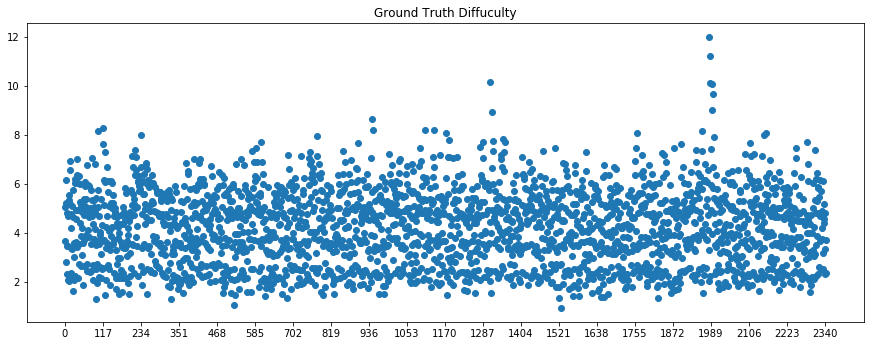

In [12]:
y_ = y.to_numpy()
plt.scatter(range(len(y_)), y_)#np.sort(y_))
plt.xticks(range(0, len(y_),int(len(y_)/20)))
plt.title("Ground Truth Diffuculty")

Text(0.5, 1.0, 'Difficulty Rate Histogram')

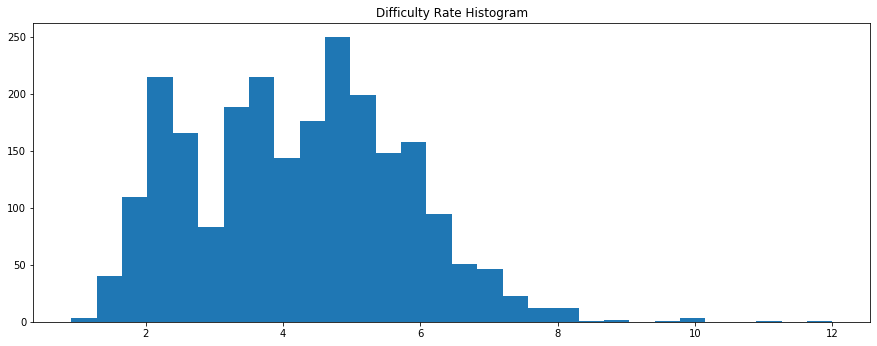

In [13]:
plt.hist(y_,bins=30)
plt.title("Difficulty Rate Histogram")

In [14]:
np.max(y_)

12.0

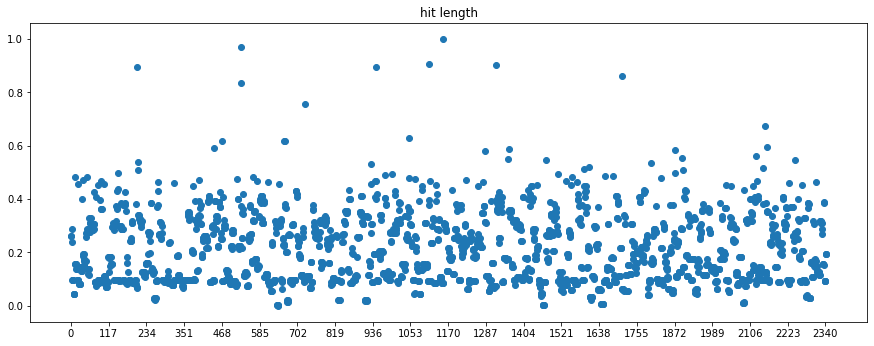

In [15]:
hit_lenght = x[:,0]
plt.xticks(range(0, len(hit_lenght),int(len(hit_lenght)/20)))
plt.scatter(range(len(hit_lenght)), x[:,0])
plt.title("hit length")
plt.show()

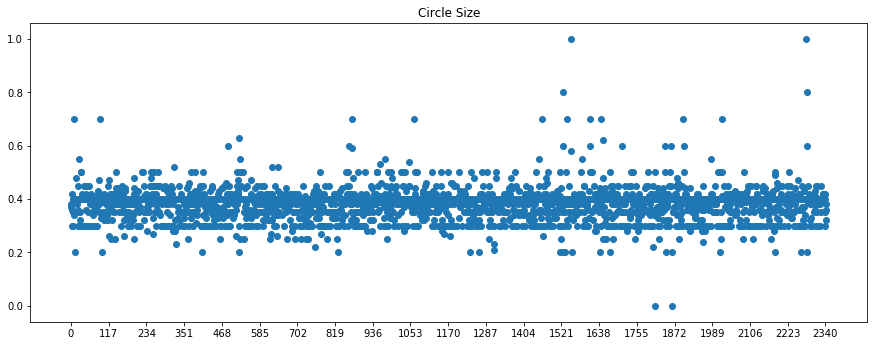

In [16]:
cs = x[:,1]
plt.xticks(range(0, len(cs),int(len(cs)/20)))
plt.scatter(range(len(cs)), cs)
plt.title("Circle Size")
plt.show()

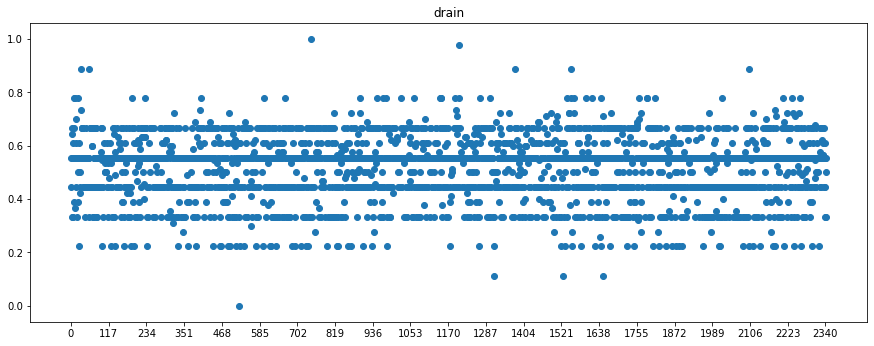

In [17]:
drain = x[:,2]
plt.xticks(range(0, len(drain),int(len(drain)/20)))
plt.scatter(range(len(drain)), drain)
plt.title("drain")
plt.show()

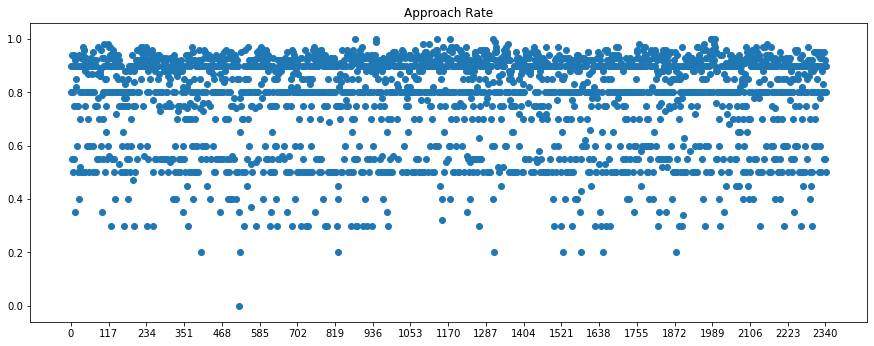

In [18]:
ar = x[:,3]
plt.xticks(range(0, len(ar),int(len(ar)/20)))
plt.scatter(range(len(ar)), ar)
plt.title("Approach Rate")
plt.show()

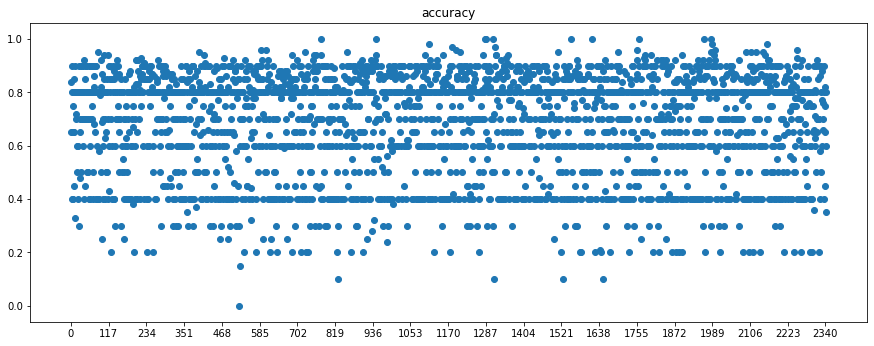

In [19]:
acc = x[:,4]
plt.xticks(range(0, len(acc),int(len(acc)/20)))
plt.scatter(range(len(acc)), acc)
plt.title("accuracy")
plt.show()

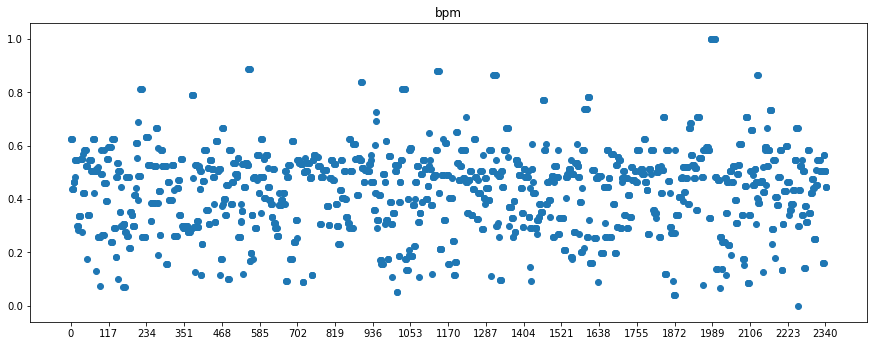

In [20]:
bpm = x[:,5]
plt.xticks(range(0, len(bpm),int(len(bpm)/20)))
plt.scatter(range(len(bpm)), bpm)
plt.title("bpm")
plt.show()

# Relations

## Grupların Anova İle İncelenmesi

Grupları sınıflandırmak arasında anlamlı fark var mı F-testi ve ANOVA incelenmesi

In [21]:
import pingouin as pg

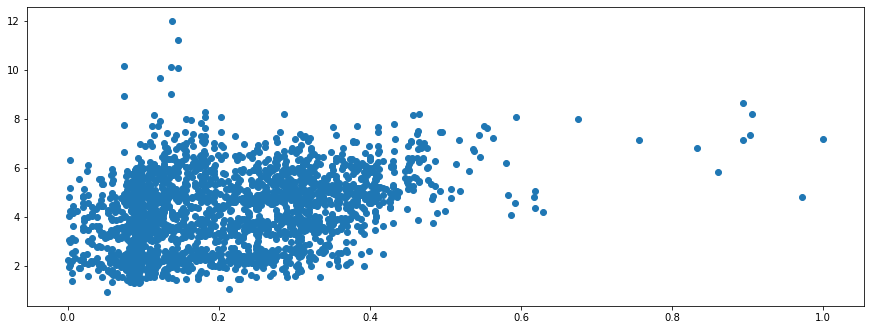

In [22]:
plt.scatter( hit_lenght,y_)#.astype(int))

In [23]:
pd.DataFrame(np.c_[hit_lenght,y_.astype(int)],columns=["hit_lenght","difficulty"]).head()

,hit_lenght,difficulty
0,0.260504,3.0
1,0.262185,5.0
2,0.287395,6.0
3,0.238655,2.0
4,0.094118,5.0


In [24]:
anova1_data = pd.DataFrame(np.c_[hit_lenght,y_.astype(int)],columns=["hit_lenght","difficulty"])
pg.anova(data=anova1_data,dv='hit_lenght',between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,12,2331,26.312953,2.257292e-56,0.119299


Difficult değerleri arasında p değeri 0.05 den küçük olduğu için anlamlı fark vardır yani bu grupların veriyi etkilediği söylenebilir. Tüm gruplar kendi içinde etkilimi söylemek için t test uygulanır. Bunun için pairwise_tukey test kullanılır ve gruplar kendi içinde incelenir.

In [25]:
pg.pairwise_tukey(data=anova1_data,dv='hit_lenght',between='difficulty')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,1.0,0.052101,0.133065,-0.080965,0.119529,-0.677364,9.999790e-01,-0.676085
1,0.0,2.0,0.052101,0.166126,-0.114026,0.119236,-0.956305,9.992061e-01,-0.955746
2,0.0,3.0,0.052101,0.182149,-0.130048,0.119219,-1.090833,9.971405e-01,-1.090271
3,0.0,4.0,0.052101,0.208130,-0.156029,0.119209,-1.308866,9.853236e-01,-1.308248
4,0.0,5.0,0.052101,0.229933,-0.177832,0.119228,-1.491527,9.581584e-01,-1.490703
5,0.0,6.0,0.052101,0.274551,-0.222450,0.119390,-1.863227,8.166671e-01,-1.860878
6,0.0,7.0,0.052101,0.331408,-0.279307,0.120025,-2.327070,4.971603e-01,-2.317150
7,0.0,8.0,0.052101,0.399095,-0.346994,0.123594,-2.807532,1.991871e-01,-2.727544
8,0.0,9.0,0.052101,0.129412,-0.077311,0.145865,-0.530017,9.999986e-01,-0.000000
9,0.0,10.0,0.052101,0.118768,-0.066667,0.137523,-0.484768,9.999995e-01,-0.319864


Tukey testinden uzak olan gruplar arasında daha anlamlı fark vardı bu ordinal veri olmasından dolayıdır. Uzak verilerden anlamlı bilgi çıkabilir.

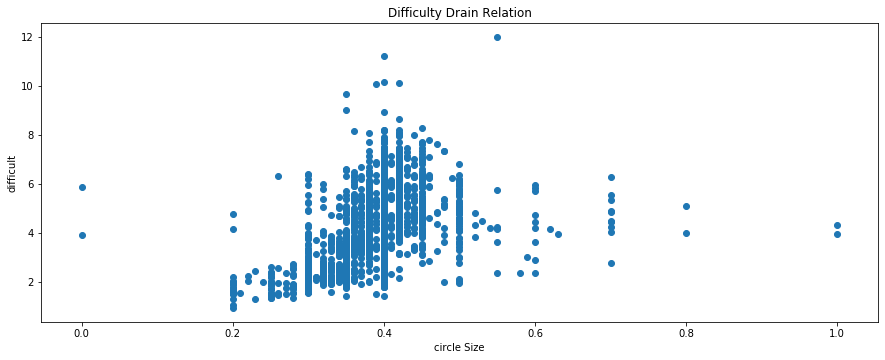

In [26]:
plt.scatter( cs, y_ )
plt.title("Difficulty Drain Relation")
plt.xlabel("circle Size")
plt.ylabel("difficult")
plt.show()

In [27]:
anova2_data = pd.DataFrame(np.c_[cs,y_.astype(int)],columns=["circle size","difficulty"])
pg.anova(data=anova2_data, dv='circle size', between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,12,2331,103.61176,3.890586e-206,0.347852


Difficult değerleri arasında p değeri 0.05 den küçük olduğu için anlamlı fark vardır yani bu grupların veriyi etkilediği söylenebilir. Tüm gruplar kendi içinde etkilimi söylemek için t test uygulanır. Bunun için pairwise_tukey test kullanılır ve gruplar kendi içinde incelenir.

In [28]:
pg.pairwise_tukey(data=anova2_data,dv='circle size',between='difficulty')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,1.0,0.200000,0.291812,-0.091812,0.051521,-1.782035,8.587791e-01,-1.778671
1,0.0,2.0,0.200000,0.332656,-0.132656,0.051394,-2.581144,3.222836e-01,-2.579634
2,0.0,3.0,0.200000,0.381365,-0.181365,0.051387,-3.529371,2.502549e-02,-3.527552
3,0.0,4.0,0.200000,0.410505,-0.210505,0.051383,-4.096782,2.972502e-03,-4.094847
4,0.0,5.0,0.200000,0.408537,-0.208537,0.051391,-4.057854,3.483892e-03,-4.055611
5,0.0,6.0,0.200000,0.411667,-0.211667,0.051461,-4.113176,2.778808e-03,-4.107992
6,0.0,7.0,0.200000,0.419375,-0.219375,0.051734,-4.240402,1.629909e-03,-4.222326
7,0.0,8.0,0.200000,0.410000,-0.210000,0.053273,-3.941972,5.529399e-03,-3.829665
8,0.0,9.0,0.200000,0.350000,-0.150000,0.062872,-2.385790,4.543964e-01,-0.000000
9,0.0,10.0,0.200000,0.403333,-0.203333,0.059277,-3.430251,3.479708e-02,-2.263378


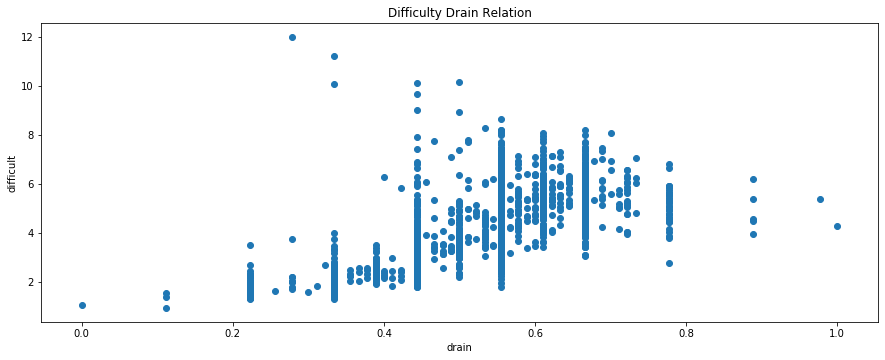

In [29]:
plt.scatter( drain, y_ )
plt.title("Difficulty Drain Relation")
plt.xlabel("drain")
plt.ylabel("difficult")
plt.show()

In [30]:
anova3_data = pd.DataFrame(np.c_[drain, y_.astype(int)], columns=["drain","difficulty"])
pg.anova(data=anova3_data, dv='drain', between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,12,2331,359.257856,0.0,0.649056


In [31]:
pg.pairwise_tukey(data=anova3_data, dv='drain',between='difficulty')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,1.0,0.111111,0.296296,-0.185185,0.071952,-2.573727,3.269172e-01,-2.568869
1,0.0,2.0,0.111111,0.392533,-0.281422,0.071776,-3.920853,6.004621e-03,-3.918559
2,0.0,3.0,0.111111,0.502195,-0.391084,0.071766,-5.449445,4.296363e-06,-5.446638
3,0.0,4.0,0.111111,0.576594,-0.465483,0.071760,-6.486677,8.315494e-09,-6.483613
4,0.0,5.0,0.111111,0.614022,-0.502911,0.071771,-7.007156,2.461806e-10,-7.003283
5,0.0,6.0,0.111111,0.608769,-0.497658,0.071868,-6.924576,4.381118e-10,-6.915849
6,0.0,7.0,0.111111,0.593229,-0.482118,0.072251,-6.672841,2.433207e-09,-6.644395
7,0.0,8.0,0.111111,0.582051,-0.470940,0.074399,-6.329909,2.282177e-08,-6.149568
8,0.0,9.0,0.111111,0.444444,-0.333333,0.087805,-3.796271,9.658137e-03,-0.000000
9,0.0,10.0,0.111111,0.425926,-0.314815,0.082784,-3.802856,9.423061e-03,-2.509234


# Anova Devamı

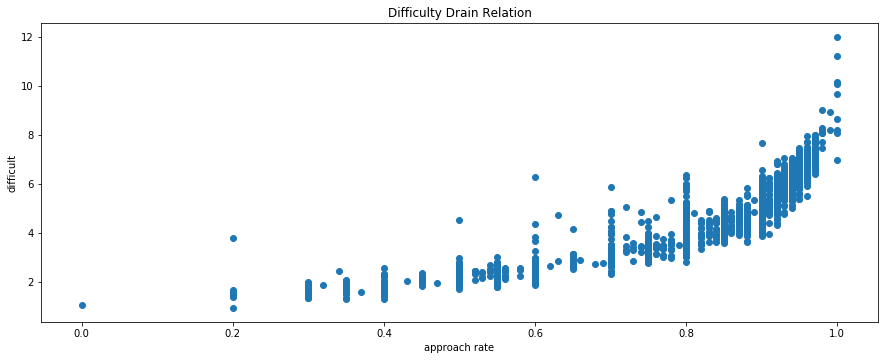

In [32]:
plt.scatter( ar, y_ )
plt.title("Difficulty Drain Relation")
plt.xlabel("approach rate")
plt.ylabel("difficult")
plt.show()

In [33]:
anova4_data = pd.DataFrame(np.c_[ar, y_.astype(int)],columns=["approach rate","difficulty"])
pg.anova(data=anova4_data, dv='approach rate', between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,12,2331,1783.711697,0.0,0.901793


In [34]:
pg.pairwise_tukey(data=anova4_data, dv='approach rate',between='difficulty')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,1.0,0.200000,0.389203,-0.189203,0.054940,-3.443799,3.329026e-02,-3.437299
1,0.0,2.0,0.200000,0.550231,-0.350231,0.054805,-6.390451,1.549559e-08,-6.386712
2,0.0,3.0,0.200000,0.778595,-0.578595,0.054798,-10.558703,0.000000e+00,-10.553264
3,0.0,4.0,0.200000,0.867981,-0.667981,0.054793,-12.190927,0.000000e+00,-12.185169
4,0.0,5.0,0.200000,0.909432,-0.709432,0.054802,-12.945394,0.000000e+00,-12.938239
5,0.0,6.0,0.200000,0.937794,-0.737794,0.054876,-13.444704,0.000000e+00,-13.427761
6,0.0,7.0,0.200000,0.961250,-0.761250,0.055168,-13.798711,0.000000e+00,-13.739888
7,0.0,8.0,0.200000,0.984615,-0.784615,0.056809,-13.811549,0.000000e+00,-13.418055
8,0.0,9.0,0.200000,0.990000,-0.790000,0.067045,-11.783095,0.000000e+00,-0.000000
9,0.0,10.0,0.200000,1.000000,-0.800000,0.063211,-12.656060,0.000000e+00,-8.350834


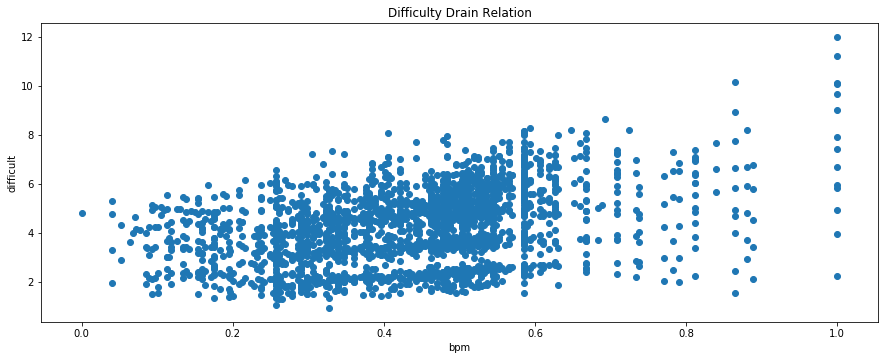

In [35]:
plt.scatter( bpm, y_ )
plt.title("Difficulty Drain Relation")
plt.xlabel("bpm")
plt.ylabel("difficult")
plt.show()

In [36]:
anova5_data = pd.DataFrame(np.c_[ar, y_.astype(int)],columns=["bpm","difficulty"])
pg.anova(data=anova5_data, dv='bpm', between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,12,2331,1783.711697,0.0,0.901793


In [37]:
pg.pairwise_tukey(data=anova5_data, dv='bpm',between='difficulty')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,1.0,0.200000,0.389203,-0.189203,0.054940,-3.443799,3.329026e-02,-3.437299
1,0.0,2.0,0.200000,0.550231,-0.350231,0.054805,-6.390451,1.549559e-08,-6.386712
2,0.0,3.0,0.200000,0.778595,-0.578595,0.054798,-10.558703,0.000000e+00,-10.553264
3,0.0,4.0,0.200000,0.867981,-0.667981,0.054793,-12.190927,0.000000e+00,-12.185169
4,0.0,5.0,0.200000,0.909432,-0.709432,0.054802,-12.945394,0.000000e+00,-12.938239
5,0.0,6.0,0.200000,0.937794,-0.737794,0.054876,-13.444704,0.000000e+00,-13.427761
6,0.0,7.0,0.200000,0.961250,-0.761250,0.055168,-13.798711,0.000000e+00,-13.739888
7,0.0,8.0,0.200000,0.984615,-0.784615,0.056809,-13.811549,0.000000e+00,-13.418055
8,0.0,9.0,0.200000,0.990000,-0.790000,0.067045,-11.783095,0.000000e+00,-0.000000
9,0.0,10.0,0.200000,1.000000,-0.800000,0.063211,-12.656060,0.000000e+00,-8.350834


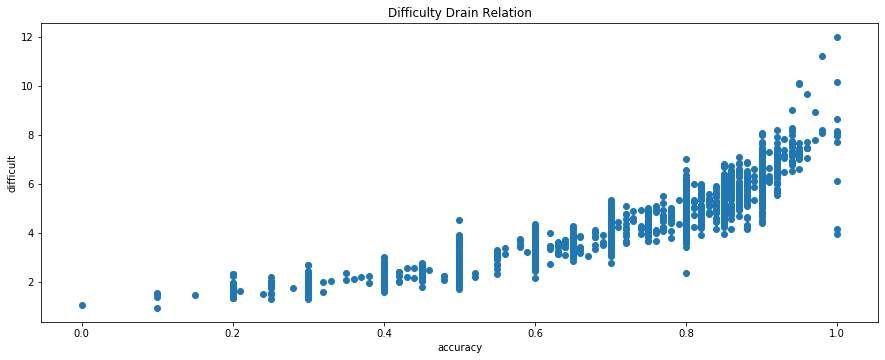

In [38]:
plt.scatter( acc, y_ )
plt.title("Difficulty Drain Relation")
plt.xlabel("accuracy")
plt.ylabel("difficult")
plt.show()

In [39]:
anova6_data = pd.DataFrame(np.c_[ar, y_.astype(int)],columns=["accuracy","difficulty"])
pg.anova(data=anova6_data, dv='accuracy', between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,12,2331,1783.711697,0.0,0.901793


In [40]:
pg.pairwise_tukey(data=anova6_data, dv='accuracy',between='difficulty')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,1.0,0.200000,0.389203,-0.189203,0.054940,-3.443799,3.329026e-02,-3.437299
1,0.0,2.0,0.200000,0.550231,-0.350231,0.054805,-6.390451,1.549559e-08,-6.386712
2,0.0,3.0,0.200000,0.778595,-0.578595,0.054798,-10.558703,0.000000e+00,-10.553264
3,0.0,4.0,0.200000,0.867981,-0.667981,0.054793,-12.190927,0.000000e+00,-12.185169
4,0.0,5.0,0.200000,0.909432,-0.709432,0.054802,-12.945394,0.000000e+00,-12.938239
5,0.0,6.0,0.200000,0.937794,-0.737794,0.054876,-13.444704,0.000000e+00,-13.427761
6,0.0,7.0,0.200000,0.961250,-0.761250,0.055168,-13.798711,0.000000e+00,-13.739888
7,0.0,8.0,0.200000,0.984615,-0.784615,0.056809,-13.811549,0.000000e+00,-13.418055
8,0.0,9.0,0.200000,0.990000,-0.790000,0.067045,-11.783095,0.000000e+00,-0.000000
9,0.0,10.0,0.200000,1.000000,-0.800000,0.063211,-12.656060,0.000000e+00,-8.350834


One Way ANOVA incelemesi sonucu gereksiz verilerin atılmasına karar verilmiştir.

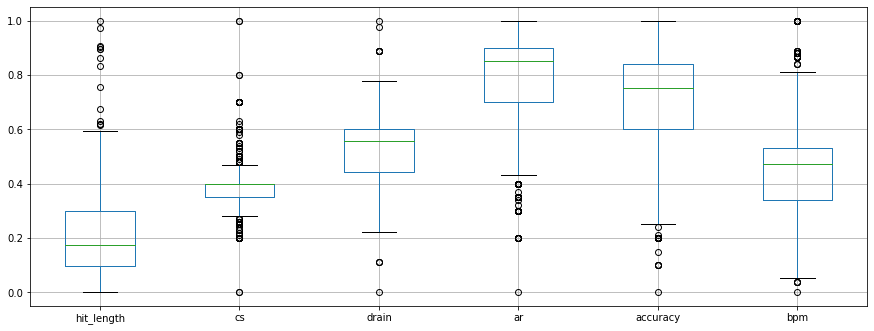

In [41]:
pd.DataFrame(x, columns=['hit_length','cs','drain','ar','accuracy','bpm']).boxplot()

12-11-10-9-0 zorluk değerlerinden anlamlı veri çıkmamaktadır bu yüzden yeterli veri toplanana kadar bu veri atılır.  

<BarContainer object of 12 artists>

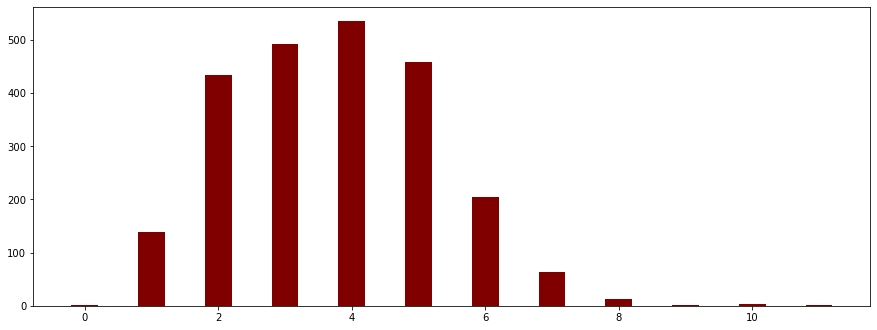

In [42]:
difficult_count = [np.count_nonzero(anova3_data['difficulty'] == i) for i in range(int(np.max(anova3_data['difficulty'])))]
plt.bar(range(len(difficult_count)),difficult_count,color ='maroon',width = 0.4)

In [43]:
difficult_count

[1, 138, 433, 491, 535, 458, 204, 64, 13, 2, 3, 1]

# Gereksiz Verinin Atılması

In [44]:
dataset = np.c_[x,y]
reduced_ds=dataset[dataset[:,6] >= 1]
reduced_ds=reduced_ds[reduced_ds[:,6] < 9]
np.min(reduced_ds[:,6]), np.max(reduced_ds[:,6])

(1.06, 8.91)

In [45]:
x = reduced_ds[:,:6]
y = reduced_ds[:,6]

In [46]:
anova_data = pd.DataFrame(np.c_[x[:,0], y.astype(int)],columns=["hit_length","difficulty"])
pg.anova(data=anova_data, dv='hit_length', between='difficulty')

,Source,ddof1,ddof2,F,p-unc,np2
0,difficulty,7,2328,44.401999,3.006242e-59,0.117785


In [47]:
pg.pairwise_tukey(data=anova_data, dv='hit_length',between='difficulty').head()

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1.0,2.0,0.133065,0.166126,-0.033061,0.011649,-2.838040,8.631404e-02,-0.277064
1,1.0,3.0,0.133065,0.182149,-0.049084,0.011482,-4.274936,5.258655e-04,-0.411391
2,1.0,4.0,0.133065,0.208130,-0.075065,0.011378,-6.597513,1.441994e-09,-0.629195
3,1.0,5.0,0.133065,0.229933,-0.096867,0.011572,-8.370721,0.000000e+00,-0.811829
4,1.0,6.0,0.133065,0.274551,-0.141486,0.013135,-10.771834,0.000000e+00,-1.184645


In [48]:
# _x,_y 0 12 arası zorluk için || x,y 0 8 arası zorluk için
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), BayesianRidge(), SVR(), RandomForestRegressor()]
results = []

for model in models:
    results.append(cross_val_score(model, x, y, cv = 10).sum() / 10)

results

[0.8723621451708453,
 0.92701960657592,
 0.9056228712828578,
 0.8723676865758427,
 0.9341645645032205,
 0.9469360794248433]

In [49]:
#Importing the required modules
import numpy as np
from scipy.stats import mode


#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist



#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
x_test = x[int(0.75*len(x)):]
y_test = y[int(0.75*len(x)):].astype(int)
y_train =  y[:int(0.75*len(x))].astype(int)
x_train = x[:int(0.75*len(x))]
y_pred = predict(x_train, y_train, x_test, 7)

#Checking the accuracy
accuracy_score(y_test, y_pred)

0.7174657534246576

In [53]:
X_train = x_train
X_test = x_test


In [54]:
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y

In [56]:
# Vectorized approach to find the 
import time

start = time.process_time()

# We are setting a range of K values and calculating the RMSE for each of them. This way we can chose the optimal K value
k_list = [x for x in range(1,50,1)]

# Calculating the distance matrix using numpy broadcasting technique 
distance = np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))

#Sorting each data points of the distance matrix to reduce computational effort 
sorted_distance = np.argsort(distance, axis = 0)

#The knn function takes in the sorted distance and returns the RMSE of the 
def knn(X_train,X_test,y_train,y_test,sorted_distance,k):
    y_pred = np.zeros(y_test.shape)
    for row in range(len(X_test)):
        
        #Transforming the y_train values to adjust the scale. 
        y_pred[row] = y_train[sorted_distance[:,row][:k]].mean() * sigma_y + mu_y

    RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
    return RMSE

#Storing the RMSE values in a list for each k value 
rmse_list = []
for i in k_list:
    rmse_list.append(knn(X_train,X_test,y_train,y_test,sorted_distance,i))
    
print(time.process_time() - start)


0.34479650000000106


Text(0, 0.5, 'RMSE')

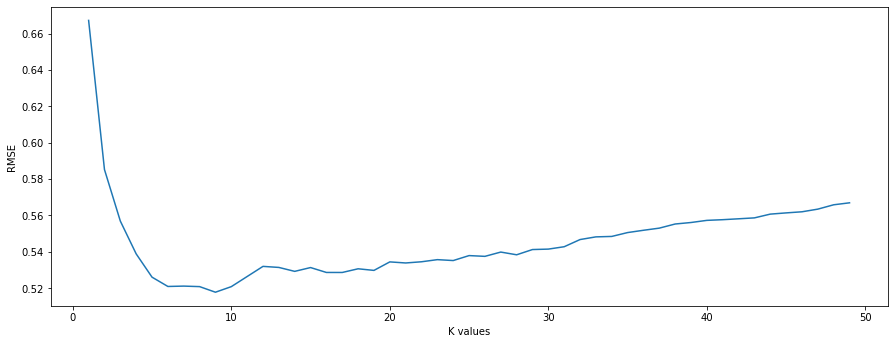

In [57]:
plt.plot(k_list,rmse_list)
plt.xlabel("K values")
plt.ylabel("RMSE")

In [58]:
#Finding the optimal K value
min_rmse_k_value = k_list[rmse_list.index(min(rmse_list))]

#Finding the lowest possible RMSE
optimal_RMSE = knn(X_train,X_test,y_train,y_test,sorted_distance,min_rmse_k_value)
optimal_RMSE / (np.max(y)-np.min(y))

0.06595658503338411

In [59]:
min_rmse_k_value

9